<h1 style="color:rgb(0,120,170)">Assignment 4: Decision Trees</h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names, and more.

Within the notebook, we provide detailed instructions which you should follow in order to maximize your final grade. Please keep in mind:

* Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

* We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

* Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unittest they won't be available either.

*Good luck! :)*

<h2 style="color:rgb(0,120,170)">Dataset</h2>

For this notebook to compile without problems, make sure that the required dataset files (provided as a zip folder via Moodle) are (unpacked and) stored in a folder called "dataset". Also make sure that this folder and the additional Python file, provided via Moodle, are in the same folder as the notebook. <br>

**Note:** The execution of this notebook will take a while, i.e., it might run for 20-30 minutes. For testing purposes, you might work with a reduced dataset (Task 4) but make sure to report the numbers etc. for the whole dataset!

<h2 style="color:rgb(0,120,170)">Task 1: Gini Impurity</h2>

In this task, we will recall the most important concepts of decision trees by walking you through a simple example. On the way you have to solve some exercises to gain basic insights. Let's start with a toy dataset for one tree.
<br> <br>

In [2]:
# nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mnist_loader import MNIST
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.figure import Figure
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
# Set random seed to ensure reproducible runs
RSEED = 50

In [3]:
# a simple data set for demonstration 
# nothing to do here
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3],
              [3, 2]])

y = np.array([0, 1, 1, 1, 0, 1, 0])

Text(0.5, 1.0, 'Demonstration Data')

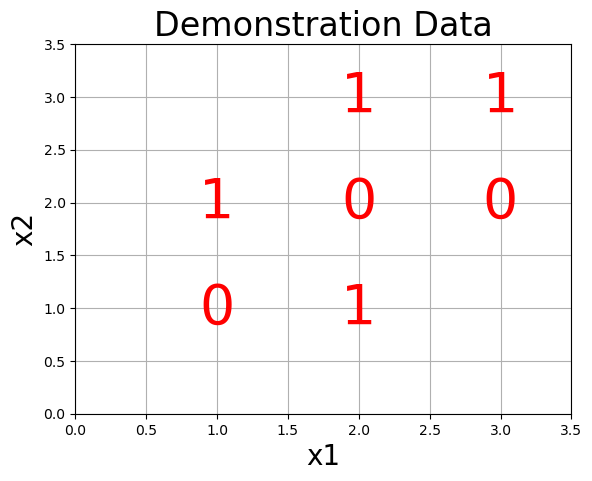

In [4]:
# nothing to do here. Just execute the cell for a proper visualization!
%matplotlib inline

# plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'r',
             ha='center', va='center')
    
# plot formatting
plt.grid(None)
plt.xlim((0, 3.5))
plt.ylim((0, 3.5))
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Demonstration Data', size = 24)

A **Decision Tree Classifier (DTC)** builds a decision tree based on the features of the data. This is equivalent to subdividing the feature space. Let's consider the example above and apply a simple heuristics. In the first step we try to subdivide the space such that we obtain the _largest possible leaf (subdivision)_ that contains only **one class**.
<br><br>
We first look at the feature $x_2$, i.e. a horizontal division of the space. For example, we could divide the space at the specific threshold $x_2 = 2.5$. Then we end up having a group of samples with features $x_2 > 2.5$ and homogenous class label 1, i.e. the two points with coordinates $\{ (2,3), (3,3) \}$ . If we instead look at the feature $x_1$, corresponding to a vertical division of the space, we cannot find an equally large or larger group of samples with the same label. Therefore, our first node in the tree is: $x_2 \leq 2.5$, i.e. we split the space and repeat the same procedure on each of the two leafs. In our case we are done with the top leaf (since both samples have the same class) and only need to repeat the procedure on the bottom leaf.

Our simple heuristics from above fails on the bottom node. We need a better criterion to decide which splits to make. <br> Nowadays the most frequently used one is called the **Gini Impurity**. 

The Gini Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled,if it was randomly labeled according to the distribution of labels in the subset.
<br>

What does that mean? 
1. Let us suppose we have $2$ labels and let $p_1, p_2$ be the fractions of points labeled with labels $1$ and $2$ (note: $p_1 + p_2 = 1$) . 
2. The probabilty to choose a point with label $1$ is $p_1$. 
3. The probability to choose label $2$ is $p_2 = 1-p_1$. 
4. Therefore, the probability to label a point of label $1$ with label $2$ is $p_1 \cdot p_2 = p_1 \cdot (1-p_1) = p_1 - p_1^2$. 
5. Analogously, the probability for points with label $2$ to be labeled with $1$ is $p_2 \cdot (1-p_2) = p_2 - p_2^2$. <br> 
6. The Gini Impurity is the sum over both: $p_1 - p_1^2 + p_2 - p_2^2 = p_1 + p_2 - p_1^2 - p_2^2 = 1 - p_1^2 -p_2^2$

The above reasoning is easy to generalize to the case where the number of labels $M$ is larger than two: $M>2$. <br>
The formula for the given dataset $Z$ is simply $I_G(Z)=1-\sum_{k = 1}^M p_k(Z)^2$, where $p_k(Z)$ is the frequency of points with labels $k$ in the dataset $Z$. <br> 

The Gini Impurity Gain is the amount of "impurity" we get rid of for a specific split $s$.

Let's assume that we get the partition $Z_{s,1}, \ldots, Z_{s,K_s}$ of $Z$ after applying $s$. 

Then the impurity gain is $g_G(Z,s) = I_G(Z) - \sum_{t=1}^{K_s} \frac{|Z_{s,t}|}{|Z|} \cdot I_G(Z_{s,t})$




<h3 style="color:rgb(210,90,80)">1.1 Calculation (15 points):</h3>

*  Calculate the Gini impurity for our toy dataset
* Calculate the Gini impurity for the top and bottom leaf in a given split  
* Calculate the Gini impurity gain for a given split in the toy dataset 

To do this, implement the necessary calculations into the function `calc_gini` and return the 4 solutions.<br>

**Note:** Your implementation should work for any dataset similar to the toy dataset (i.e. binary labels, two dimensional)!

In [5]:
def calc_gini(X:np.ndarray, y:np.ndarray, split:float, entry:int):
    """Function that calculates the Gini Impurity of the whole dataset and of the two subsets after a given split is performed.
    Returns also the impurity gain from this specific split.

    Parameters
    ----------
    X : np.ndarray
        data matrix
    y : np.ndarray
        data vector - labels
    split : float
        value at which the split is performed
    entry : int
        axis on which the split is performed, 
        0 for the first feature (=x-axis) 1 for the second feature (=y-axis)
    Returns
    -------
    tuple(float,float,float,float)
        Function returns the overall gini impurity, the gini impurity of each of the two subsets 
        and the impurity gain of the split as floats
    """
    gini_impurity = None
    gini_top = None
    gini_bottom = None
    impurity_gain = None
    #your code ↓↓↓
    def calculate_gini(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        gini = 1 - np.sum(probabilities**2)
        return gini

    # Function to calculate Gini Impurity Gain
    def calculate_gini_impurity_gain(parent_labels, left_labels, right_labels):
        gini_parent = calculate_gini(parent_labels)
        gini_left = calculate_gini(left_labels)
        gini_right = calculate_gini(right_labels)
        total_samples = len(parent_labels)
        impurity_gain = gini_parent - (
            (len(left_labels) / total_samples) * gini_left +
            (len(right_labels) / total_samples) * gini_right
        )
        return impurity_gain

    # Identify samples in the top and bottom leaf after the split
    top_leaf_mask = X[:, entry] <= split
    bottom_leaf_mask = ~top_leaf_mask

    # Calculate Gini Impurity for the entire dataset
    gini_impurity = calculate_gini(y)

    # Calculate Gini Impurity for each subset
    gini_top = calculate_gini(y[top_leaf_mask])
    gini_bottom = calculate_gini(y[bottom_leaf_mask])

    # Calculate Gini Impurity Gain
    impurity_gain = calculate_gini_impurity_gain(y, y[top_leaf_mask], y[bottom_leaf_mask])

    return gini_impurity, gini_top, gini_bottom, impurity_gain

    return gini_impurity, gini_top, gini_bottom, impurity_gain


In [6]:
# nothing to do here, just run the cell
x2_split_point= 2.5
gini_impurity, gini_top, gini_bottom, impurity_gain = calc_gini(X,y,x2_split_point,1)
print(f"Results for x2 = {x2_split_point}\n")
print(f"Gini impurity for the entire dataset: {gini_impurity:0.4f}\n"
f"Gini impurity top leaf: {gini_top:0.4f}\n"
f"Gini impurity bottom leaf: {gini_bottom:0.4f}\n"
f"Gini impurity gain: {impurity_gain:0.4f}\n")

x2_split_point= 1.5
print(f"Results for x2 = {x2_split_point}\n")
gini_impurity, gini_top, gini_bottom, impurity_gain = calc_gini(X,y,x2_split_point,1)
print(f"Gini impurity for the entire dataset: {gini_impurity:0.4f}\n"
f"Gini impurity top leaf: {gini_top:0.4f}\n"
f"Gini impurity bottom leaf: {gini_bottom:0.4f}\n"
f"Gini impurity gain: {impurity_gain:0.4f}")

Results for x2 = 2.5

Gini impurity for the entire dataset: 0.4898
Gini impurity top leaf: 0.4800
Gini impurity bottom leaf: 0.0000
Gini impurity gain: 0.1469

Results for x2 = 1.5

Gini impurity for the entire dataset: 0.4898
Gini impurity top leaf: 0.5000
Gini impurity bottom leaf: 0.4800
Gini impurity gain: 0.0041


<h3 style="color:rgb(210,90,80)">1.2 Question (5 points):</h3>

***Based on the results of Gini impurity for the two different split locations of $x_2$, which of the following statements are correct?***

a1_) The top leaf of the split at $x_2=1.5$ has smaller Gini impurity than the top leaf of the split at $x_2=2.5$ <br>
b1_) The Gini impurity of the entire dataset does not depend on the split location. <br>
c1_) The Gini impurity gain of the split at $x_2=1.5$ is smaller than at $x_2=2.5$, indicating that $x_2=1.5$ is a worse splitting point.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [7]:
#examples for you
example_of_true_variable = False
example_of_false_variable = False

#your answers go here
a1_=False
b1_=True
c1_=True


<h2 style="color:rgb(0,120,170)">Task 2: Train a simple decision tree </h2>

Next, you should provide a Python routine for the previous example. In the cells below there is the function `dec_tree` where you have to implement the following for **Task 2.1**:
* Train a decision tree on the dataset $X$ from Task 1 and remember to pass the random seed `RSEED` defined in the beginning.
* Return the number of tree nodes, the maximum depth of the tree, and the accuracy.

<h3 style="color:rgb(210,90,80)">2.1 Code (10 points):</h3>

In [8]:
def dec_tree(seed:int, X:np.ndarray, y:np.ndarray):
    """Trains a decision tree and returns certain attributes of the received model.
    Hint: You can use sklearn's DecisionTreeClassifier for this task, don't forget to feed it the seed.
    Check the sklearn docs for more information on how to access certain attributes. 
    Parameters
    ----------
    seed : int
        Seed for reproducability.
    X : np.ndarray
        np ndarray, data matrix
    y : np.ndarray
        np ndarray, data vector - labels
    Returns
    -------
    tuple(float,float,float)
        Returns number of nodes in tree, max depth of the tree and accuracy 
    """
    nr_nodes = None
    max_depth = None
    acc = None
    #your code ↓↓↓
     # Initialize DecisionTreeClassifier with the provided seed
    dt_model = DecisionTreeClassifier(random_state=seed)

    # Train the decision tree model
    dt_model.fit(X, y)

    # Get the number of nodes and the maximum depth of the tree
    nr_nodes = dt_model.tree_.node_count
    max_depth = dt_model.tree_.max_depth

    # Calculate accuracy
    acc = dt_model.score(X, y)
    
    return nr_nodes, max_depth, acc


In [9]:
# print number of tree nodes and the maximum depth of tree
nr_nodes, max_depth, acc = dec_tree(RSEED,X,y)
print(f'Decision tree has {nr_nodes} nodes with maximum depth {max_depth}.')
print(f'Model accuracy: {acc}')

Decision tree has 11 nodes with maximum depth 4.
Model accuracy: 1.0


<h2 style="color:rgb(0,120,170)">Task 3: Decision tree on a real data set</h2>

Now we will apply the classifier to a well known real-world benchmark data set, namely the "Fashion MNIST" dataset. It consists of images of clothing, like sneakers and shirts. It was created to be an alternative to the famous MNIST benchmark dataset, which is nowadays considered as too easy for the most recent algorithms. Let us first load the train and test set, using the files provided in Moodle. The train and test data are represented as flattened pixel arrays (28x28=784pixels), and the label vector indicates the different classes (0 to 9).

In [10]:
# nothing to do here. Just execute the cell
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
n_train = 6000 # max is 60K
n_test = 1000 # max is 10K
x_train = np.array(img_train)
y_train = np.array(labels_train)
# x_train = np.array(img_train)[:n_train]
# y_train = np.array(labels_train)[:n_train]
print(x_train.shape, y_train.shape)

img_test, labels_test = data.load_testing()
x_test = np.array(img_test)
y_test = np.array(labels_test)
# x_test = np.array(img_test)[:n_test]
# y_test = np.array(labels_test)[:n_test]
print(x_train.shape, y_test.shape)

(60000, 784) (60000,)
(60000, 784) (10000,)


To know what we are dealing with, let us plot some of the images:

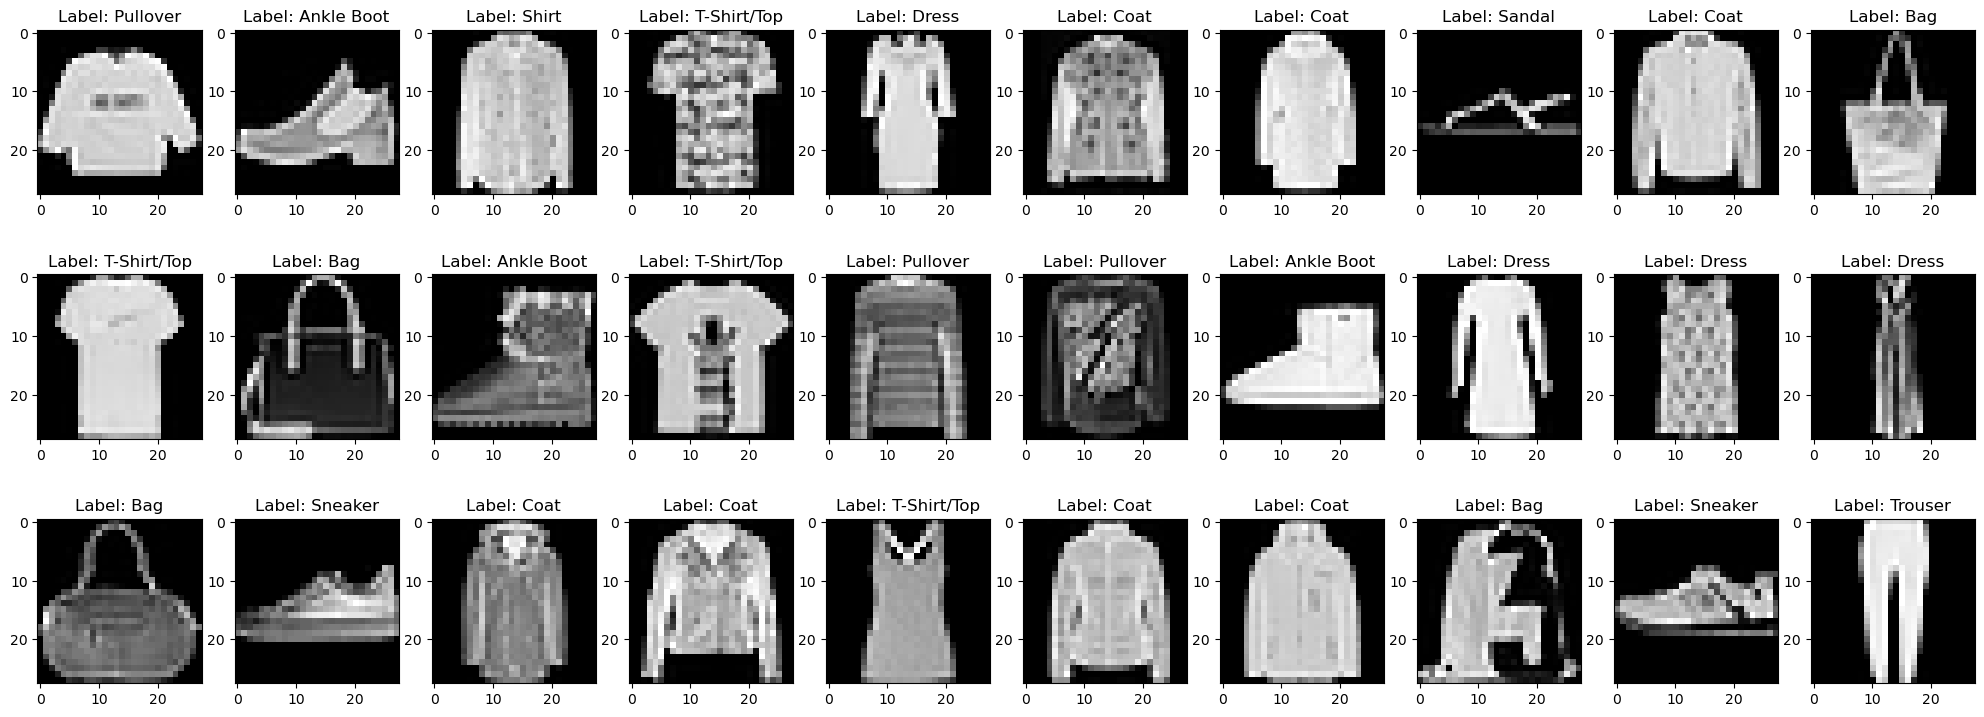

In [11]:
# nothing to do here. Just execute the command!
arr = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
plt.figure(figsize=(25, 9))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    two_d = (np.reshape(x_train[i], (28, 28))).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.title('Label: {0}'.format(arr[y_train[i]]))
plt.show()

Here, we provide you with a routine that trains a decision tree for the given training set. The function `get_evaluation` should additionally help you to compute accuracies and provide confusion matrices and appropriate heatmaps.

In [12]:
# nothing to do here. Just execute the cell!
print('\nPreparing classifier...')
model = DecisionTreeClassifier(criterion="gini", max_depth=50, splitter="best", random_state=RSEED)
model.fit(x_train,y_train)


Preparing classifier...


DecisionTreeClassifier(max_depth=50, random_state=50)

In [13]:
# nothing to do here. Just execute the cell!
"""
Evaluates the model and returns accuracy as well as a confusion matrix. Also the time for prediction can be calculated.
@param model, sklearn model, trained model
@param x_test, np ndarray, data matrix
@param y_test, np ndarray, data vector
"""
def get_evaluation(model, x_test, y_test):
    start = time.time()
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print('\nPredicted values: ', y_pred)
    print('\nAccuracy of classifier on test image data: ', accuracy)
    print('\nConfusion matrix: \n', conf_mat)
    print('\nTime: ', time.time()-start)

    plt.matshow(conf_mat)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None


Predicted values:  [0 1 6 ... 8 8 2]

Accuracy of classifier on test image data:  0.7983

Confusion matrix: 
 [[735   5  14  43   8   3 179   1  12   0]
 [  5 965   3  16   4   0   5   0   2   0]
 [ 24   4 682  18 140   3 119   0   9   1]
 [ 43  33  17 818  48   1  36   0   4   0]
 [ 10   2 147  43 687   1 103   0   6   1]
 [  2   1   1   2   2 876   1  61  21  33]
 [172   8  99  41 107   3 553   0  16   1]
 [  1   0   0   0   0  52   2 865   5  75]
 [ 18   2  17   6  13  11  19   6 905   3]
 [  1   0   1   2   1  27   3  66   2 897]]

Time:  0.07014060020446777


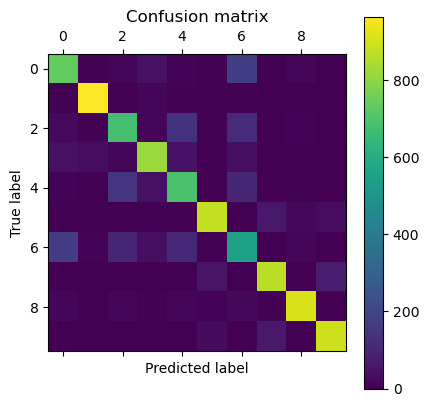

In [14]:
# nothing to do here. Just execute the command!
_ = get_evaluation(model, x_test, y_test)

In order to obtain a better performance, we apply a hyperparameter search in **Task 3.1**. 
* To this end create a parameter grid (dictionary) which iterates over the following quantities:
    - `criterion`: 'gini' and 'entropy'
    - `max_depth`: 10, 50 and 100
    - `splitter`: 'random' and 'best'
    - **Hint:** Have a look at the documentation of sklearn.model_selection.RandomizedSearchCV to get an idea of how this parameter grid should look like.
* Use a decision tree classifier and RandomizedSearchCV with 5 iterations and 3 fold cross validation. Use the built-in routines from sklearn for this and don't forget to pass `random_state=RSEED`.
* Evaluate the best parameter combination from this model.
* Print the accuracy and plot the confusion matrices and heatmaps of the model evaluated at the test set (use the previously implemented routine `get_evaluation` for this).

Again, don't forget to pass the seed in the **decision tree classifier** and **RandomizedSearchCV**. Warning: this may take several minutes ;)

<h3 style="color:rgb(210,90,80)">3.1 Code (25 points):</h3>

In [15]:
# create parameter grid (dictionary) for RandomizedSearchCV

# your code ↓↓↓
param_dict_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'splitter': ['random', 'best']
}



In [16]:
def train_dec_tree(x_train:np.ndarray,y_train:np.ndarray,param_dict_grid:dict,seed:int,n_iter:int,cv:int):
    """Trains a decision tree using cross-validation and returns certain attributes of the received model including the best
    parameter combination. Again use (only!) the implementations from sklearn already imported for this assignment and don't forget the seed.

    Parameters
    ----------
    x_train : np.ndarray
        data matrix
    y_train : np.ndarray
        data vector - labels
    param_dict_grid : dict
        dictionary of parameters for grid search (RandomizedSearchCV)
    seed : int
        seed for reproducability, feed to both RandomizedSearchCV and the DecisionTreeClassifier!
    n_iter : int
        number of iterations (RandomizedSearchCV)
    cv : int
        number of folds in CV (RandomizedSearchCV)

    Returns
    -------
    tuple(dict, sklearn.model_selection._search.RandomizedSearchCV)
        Best model parameters as dict and the best sklearn model fit on the training data.
        Don't forget to fit the final best model on the training data, before returning it.
    """

    classifier = None
    model = None
    model_best_params = None

    #your code ↓↓↓
    classifier = DecisionTreeClassifier(random_state=seed)
    
    # Create RandomizedSearchCV instance
    random_search = RandomizedSearchCV(classifier, param_distributions=param_dict_grid,
                                       n_iter=n_iter, cv=cv, random_state=seed)

    # Fit the model on the training data
    random_search.fit(x_train, y_train)

    # Get the best model parameters and the best model
    model_best_params = random_search.best_params_
    model = random_search.best_estimator_

    
    return model_best_params,model



Predicted values:  [0 1 6 ... 8 2 1]

Accuracy of classifier on test image data:  0.8105

Confusion matrix: 
 [[743   6  18  39  10   4 168   0  12   0]
 [  7 966   4  15   2   1   3   0   1   1]
 [ 23   3 692  10 146   0 115   0  11   0]
 [ 40  28  16 830  38   1  40   0   5   2]
 [  7   2 143  56 704   1  83   0   4   0]
 [  3   0   1   2   0 889   1  66   9  29]
 [160   8  99  48  87   0 581   0  17   0]
 [  0   0   0   0   0  56   0 871   5  68]
 [  8   1  11   8   4  13  16   6 926   7]
 [  0   1   0   0   0  30   0  61   5 903]]

Time:  0.04978585243225098
The best parameters are: {'splitter': 'best', 'max_depth': 50, 'criterion': 'entropy'}


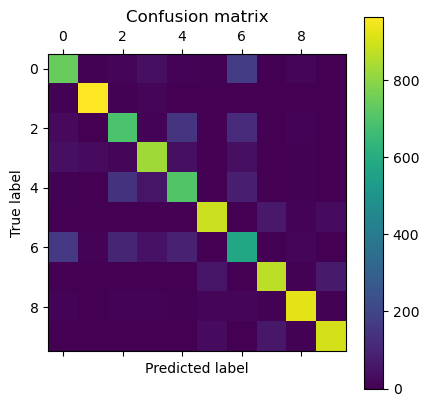

In [17]:
# print the results
params_dec_tree, model_dec_tree = train_dec_tree(x_train,y_train,param_dict_grid,RSEED,5,3)
#print(type(params_dec_tree),type(model_dec_tree))
_ = get_evaluation(model_dec_tree, x_test, y_test)
print("The best parameters are: {}".format(params_dec_tree))

If you did the task correctly, you should obtain a slightly better result than before.

<h2 style="color:rgb(0,120,170)">Task 4: Comparison with KNN and SVMs</h2>

In this task we compare the performace of the Decision Tree Classifier to two other Classifiers, namely KNN and SVM, also evaluated on the Fashion MNIST dataset:

* **Task 4.1**: Implement a KNN classifier with `n_neighbors=5`, `weights='distance'`, and `p=1`. Print the accuracy and plot the confusion matrices and heatmaps of the model evaluated at the test set (again, you can use the previously implemented function `get_evaluation` for this). 
* **Task 4.2**: Implement a SVM classifier with `C=10`, `kernel='poly'`, and `gamma='auto'`. Print the accuracy and plot the confusion matrices and heatmaps of the model evaluated at the test set (again, you can use the previously implemented function `get_evaluation` for this). 

This may also take some time!

Afterwards, answer some questions that correspond to your observations (**Task 4.3**).

<h3 style="color:rgb(210,90,80)">4.1 Code (10 points):</h3>

In [22]:
def trainKNN(x_train: np.ndarray,y_train:np.ndarray,n_neighbors:int,weights:str,p:float): 
    """Trains a KNN classifier on the given dataset.
    Again use the sklearn implementation, but no need to set a seed for this classifier.
    Parameters
    ----------
    x_train : np.ndarray
        data matrix
    y_train : np.ndarray
        data vector - labels
    n_neighbors : int
        KNN parameter, number of neighbors
    weights : str
        Knn parameter, mode for weights
    p : float
        power parameter for the Minkowski metric (see documentation: neighbors.KNeighborsClassifier)

    Returns
    -------
    KNeighborsClassifier
        Returs the trained KNN model.
    """
    model = None
    # your code ↓↓↓
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    model.fit(x_train, y_train)

    return model



Predicted values:  [0 1 2 ... 8 8 2]

Accuracy of classifier on test image data:  0.8671

Confusion matrix: 
 [[875   1  13  12   3   0  88   2   6   0]
 [  5 970   8  14   1   0   2   0   0   0]
 [ 12   1 804  11  84   0  87   0   1   0]
 [ 35   9   8 888  35   0  23   0   2   0]
 [  3   0 107  27 784   0  78   0   1   0]
 [  0   0   0   1   0 881   0  70   1  47]
 [198   2 111  19  68   0 596   0   6   0]
 [  0   0   0   0   0   6   0 949   0  45]
 [  4   1  11   0   4   2   8  10 958   2]
 [  0   0   0   0   0   3   0  31   0 966]]

Time:  534.5329601764679


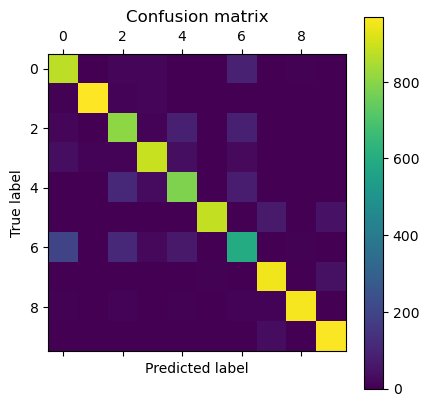

In [23]:
# print the results
knn_model = trainKNN(x_train,y_train,5,'distance',1)
_ = get_evaluation(knn_model, x_test, y_test)

<h3 style="color:rgb(210,90,80)">4.2 Code (10 points):</h3>

In [50]:
def trainSVM(x_train:np.ndarray,y_train:np.ndarray,C:float,kernel:str,gamma:str,seed:int):
    """ Trains an SVM classifier on the given dataset.
    Again use the sklearn implementation, more information in the docs: 
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#
    and don't forget to set the seed.
    Parameters
    ----------
    x_train : np.ndarray
        data matrix
    y_train : np.ndarray
        data vector - labels
    C : float
        regularization parameter
    kernel : str
        type of kernel being used
    gamma : str
        kernel coefficient
    seed : int
        seed for reproducability

    Returns
    -------
    svm.SVC Classifier
        Returs the trained SVM model.
    """
    model = None
    # your code ↓↓↓
    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=seed)
    model.fit(x_train, y_train)
    
    return model

<class 'sklearn.svm._classes.SVC'>

Predicted values:  [0 1 2 ... 8 8 1]

Accuracy of classifier on test image data:  0.8772

Confusion matrix: 
 [[827   0  19  18   2   1 121   0  10   2]
 [  1 988   0   8   1   0   2   0   0   0]
 [ 23   2 816  13  76   1  65   0   4   0]
 [ 44  19  21 870  23   0  23   0   0   0]
 [  7   3 100  35 794   0  58   0   3   0]
 [  2   0   0   1   0 946   0  31   3  17]
 [140   6  87  34  57   0 667   0   9   0]
 [  0   0   0   0   0  16   0 942   0  42]
 [ 13   0   3   2   2   2  13   1 963   1]
 [  0   0   0   0   0  13   0  27   1 959]]

Time:  63.2118239402771


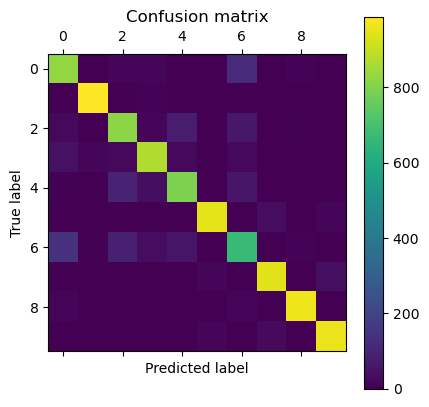

In [51]:
# print the results
svm_model = trainSVM(x_train,y_train,10,'poly','auto', RSEED)
print(type(svm_model))
_ = get_evaluation(svm_model, x_test, y_test)

<h3 style="color:rgb(210,90,80)">4.3 Code (5 points):</h3>

Congrats, you made it this far! Now let's put everything together :)

- Collect all the accuracies of the different classifiers including the decision tree accuracies with best, as well as predefined parameters (from Task 3).
- Additionally assign the found best parameters for the decision tree to the corresponding variables.
- Then, in the next cell, plot the accuracy of the four classifiers (decision tree with fixed parameters, decision tree with the best parameters, KNN, and SVM) in a to compare them. Make sure to only access data that you put into the cell below (with the tag "value_check"). Use a **bar plot** with y-axis in the range of $[0,1]$.
- Make another bar plot with the four inference times (in seconds) of the four classifiers. 

**Note:** Please assign the numerical values to the variables in float format (i.e. 0.9876 for 98.76% accuracy).

In [53]:
# Enter accuracies and times with 4-digit precision after the comma, make sure to use the right datatypes for all variables
# your results ↓↓↓

#accuracies (floats) and training time (seconds, also floats)

dec_tree_fixed_params_acc = 0.8671
dec_tree_fixed_params_time = 0.8772

dec_tree_best_params_acc = 534.5329
dec_tree_best_params_time = 63.2118

KNN_acc = 0.8671
KNN_time = None

SVM_acc = 0.8772
SVM_time = None

# best parameters dec_tree:

par_splitter_ = "best"       # str
par_maxdepth_ = 50        # int
par_criterion_ = "gini"     # str


#### Interlude: Plotting Guide

In [54]:
# Here is an example plot
def example_plot(X:np.ndarray,y:np.ndarray):
    """For your convenience we implemented an example plot, to show you what we expect you to return

    Parameters
    ----------
    X : np.ndarray
        data x
    y : np.ndarray
        data y
    Returns
    -------
    matplotlib.figure.Figure
        a matplotlib figure object
    """

    # This creates a figure object - you can imagine it as an empty sheet of paper
    example_fig = plt.figure(figsize=(4,4))
    # This adds the plot to your empty sheet, PLEASE don't forget to label the axes!
    plt.scatter(X,y, c=["green"])
    # add labels
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    # add title
    plt.title('Example Plot')
    # watch out, this also creates a figure, but has a different name (called "_") and will not be returned, but will be displayed (unittest fails)
    _, ax = plt.subplots(figsize=(4,4))
    y = [0.5,1.5,3,4,5,1.7,3,4,5,1.5,0.5]
    ax.scatter(X,y, c=["red"])
    ax.set_title("This plot appears here \n but never in our test framework :(")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    return example_fig
    

<class 'matplotlib.figure.Figure'>


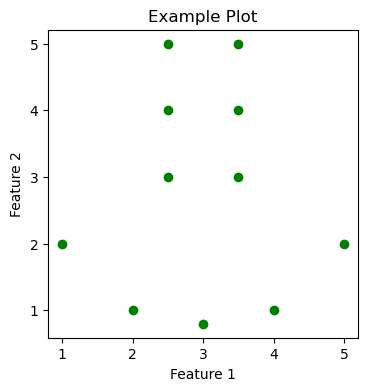

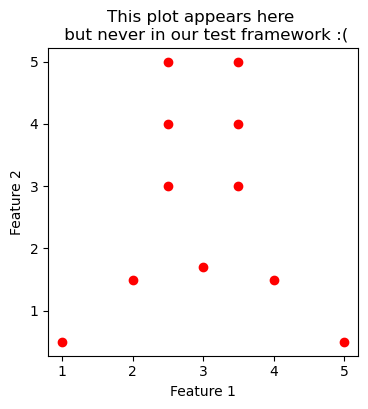

In [55]:
# Nothing to do here, just run the cell and smile.
example_fig = example_plot(np.asarray([1,2,2.5,2.5,2.5,3,3.5,3.5,3.5,4,5]),np.asarray([2,1,3,4,5,0.8,3,4,5,1,2]))
print(type(example_fig))
assert isinstance(example_fig, Figure)

#### ... now back to the assignment:

In [56]:
# your code for the visualization
## your code goes here ↓↓↓
def accuracy_plot(accuracies: list):
    """creates a bar-plot from the classifier accuracies, make sure you return a figure object containing your plot.

    Parameters
    ----------
    accuracies : list
        list of accuracies from the previous cell 

    Returns
    -------
    Figure
        a matplotlib figure object, the barplot of your accuracies
    """
    fig1 = None
    # your code goes here ↓↓↓
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    classifiers = ['Decision Tree (Fixed Params)', 'Decision Tree (Best Params)', 'KNN', 'SVM']
    ax1.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple'])
    ax1.set_ylim([0, 1])
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Classifier Accuracies')
    
    return fig1




In [59]:
# your code for the visualization
def time_plot(times: list):
    """creates a bar-plot from the classifier timings, make sure you return a figure object containing your plot.

    Parameters
    ----------
    times : list
        list of timings from the previous cell 

    Returns
    -------
    Figure
        a matplotlib figure object, the barplot of your timings
    """
    fig2 = None
    # your code goes here ↓↓↓
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Replace None values with 0
    times = [0 if t is None else t for t in times]

    classifiers = ['Decision Tree (Fixed Params)', 'Decision Tree (Best Params)', 'KNN', 'SVM']
    ax2.bar(classifiers, times, color=['blue', 'green', 'red', 'purple'])
    ax2.set_ylabel('Time (seconds)')
    ax2.set_title('Classifier Training Time')
    
    return fig2


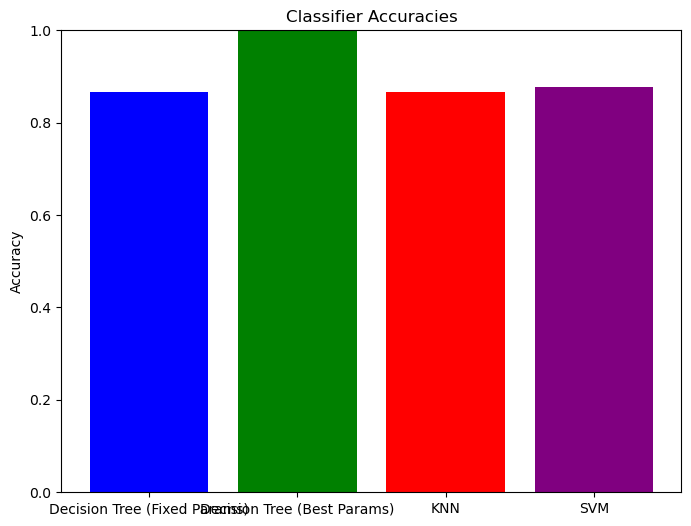

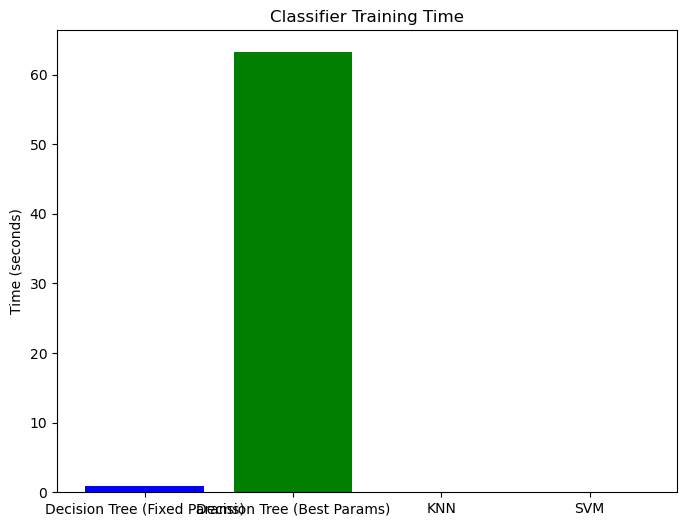

In [60]:
# Nothing to do here, just run the cell and
accuracies = [dec_tree_fixed_params_acc, dec_tree_best_params_acc, KNN_acc, SVM_acc]
times = [dec_tree_fixed_params_time, dec_tree_best_params_time, KNN_time, SVM_time]

fig_acc = accuracy_plot(accuracies)
fig_time = time_plot(times)
assert isinstance(fig_acc, Figure)
assert isinstance(fig_time, Figure)

<h3 style="color:rgb(210,90,80)">4.4 Question (5 points):</h3>

***What observations can you make so far? Add your answer to the variables below (several may be correct).***

According to the `get_evaluation` function:

a4_) The decision tree model is faster in terms of inference time and yields a better accuracy than KNN and SVM. <br>
b4_) SVM is the algorithm with the highest accuracy among KNN, SVM, and decision trees.<br>
c4_) Although this is already a large dataset, it is out of expectation that the SVM with kernel has higher prediction time than the decision tree.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. <br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [18]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

# your solutions go here ↓↓↓
a4_=False
b4_=True
c4_=False


<h2 style="color:rgb(0,120,170)">Task 5: Preparation towards ensembles of trees</h2>

In the upcoming lectures, you will discuss ensemble methods for trees that aggregate and/or average single tree models to achieve better performances and/or faster runtimes compared to the ones we used here. Random Forest is a famous example where we average over trees such that the overall variance (of the average) is reduced. We will now formalize the situation:

Let's say you have $X_1,...,X_B$ identically distributed random variables which are NOT necessarily independent. Let us denote the variance of a single variable $X_i$ by $\sigma^2$ and the correlation coefficient between two $X_i$ and $X_j$ for $j \ne i$ by $\rho=\frac{E(X_i X_j)-E(X_i)E(X_j)}{\sigma^2}$ (keep in mind that all $X_i$'s are identically distributed!). 

In **Task 5.1**, show that $$\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right)=\rho \sigma^2 +\frac{1-\rho}{B} \sigma^2. \quad (1)$$
This gives some intuition about how to control the overall variance of averages. One can reduce it e.g. by a small correlation coefficient $\rho$ and a large number of models $B$.

1. Apply the definition of the variance to the given average. 
2. Split up the resulting double sum in parts with equal and unequal indices. 
3. Apply the definition for $\rho$ and replace the sums with the number of occurences of the respective term (how often the indices appear).
4. Rewrite this to get the desired solution.

**Note:** Denote in your calculation where you tackle each of this points.

<h3 style="color:rgb(210,90,80)">5.1 Calculation (15 points):</h3>



$$\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right)=$$

1. Apply the definition of the variance to the given average:

$$ \text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right) $$

2. Split up the resulting double sum in parts with equal and unequal indices:

$$ \frac{1}{B^2} \sum_{i=1}^B \sum_{j=1}^B \text{Cov}(X_i, X_j) $$

3. Apply the definition for \( \rho \) (correlation coefficient) and replace the sums with the number of occurrences of the respective term:

$$ \frac{1}{B^2} \left( \sum_{i=1}^B \text{Var}(X_i) + \sum_{i \neq j} \rho \sigma^2 \right) $$

4. Rewrite this to get the desired solution:

$$ \frac{1}{B^2} \left( B \sigma^2 + B(B-1) \rho \sigma^2 \right) $$

5. Further simplify:

$$ \frac{\rho \sigma^2}{B} + \frac{1 - \rho}{B} \sigma^2 $$

6. Combine terms:

$$ \frac{\rho \sigma^2 + (1 - \rho) \sigma^2}{B} = \frac{\rho \sigma^2}{B} + \frac{1 - \rho}{B} \sigma^2 $$

So, we have shown that

$$ \text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right) = \frac{\rho \sigma^2}{B} + \frac{1 - \rho}{B} \sigma^2 $$


In [62]:
# executability check
calc_gini(np.eye(2),np.ones(2),0.5,1)
dec_tree(RSEED,np.ones((2,2)),np.ones(2))
train_dec_tree(np.ones((10,2)),np.ones(10),{"max_depth":[1,2,4,5,6]},RSEED,10,10)
trainKNN(np.ones((10,2)),np.ones(10),1,'distance',1)
trainSVM(np.ones((4,2)),np.array([0,1,0,1]),1,'poly','auto',RSEED)
assert(type(answer)==bool for answer in [a1_,b1_,c1_,a4_,b4_,c4_])
print("Executable")

Executable


C:\Users\ayseb\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


**Note:** The execution of this notebook will take a while, i.e., it might run for 20-30 minutes. For testing purposes, you might work with a reduced dataset (Task 4) but make sure, that in the end you run the notebook over the whole data, and report the correct numbers etc.!